### NetID: my354

# Autoencoders

This code includes implementations of various simple autoencoders using the Keras front end to TensorFlow.
You should first run all of the code on the MNIST data, and gain a basic understanding of what everything is doing. 
Then, carry out the simple experiments described in Problem 2 of the assignment. For 2(b) (10 points), you need to run everything on the Fashion MNIST data and fill in the cells marked _your documentation/description goes here_ with documentation of the code or descriptions of the results. You should also include more plots of images and weights, as described in the assignment writeup. For 2(c) (10 points) you will fit a series of networks, varying the dimension of the bottleneck.

The starter code for this assignment is from [https://github.com/ardendertat/Applied-Deep-Learning-with-Keras](https://github.com/ardendertat/Applied-Deep-Learning-with-Keras). For Keras documentation, see [https://keras.io](https://keras.io).



In [2]:
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.regularizers import l1
from keras.optimizers import Adam

Using TensorFlow backend.


## Utility functions

This function plots the n number of orignal images and then their reconstructions according to the autoencoder used. The dims input is going to be (28,28) so we can reshape the (784,1) vector into an image that can be displayed

In [21]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    plt.figure(figsize=(2*n, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

## Read the data

Here we read in the data, first we divide each point by 255 to normalize to 0-1 (grey scale is from 0-255). Then, we reshape the train and test data so each image is a (784,1) length vector instead of a (28,28) array. We have 60,000 train images and 10,000 test image.

In [9]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Shallow autoencoder

Here we have a single encoding and single decoding layer. The coding layer is a ReLU activation layer that converts the input image from 784 dimensions to 32. The decoding layer then takes the coded image (again reduced to 32 dimensions) and converts it to a vector of length 784 (the original input image size) using the sigmoid activation. Recall, ReLU (rectified linear unit) function is:
$$f(x)=max(0,x)$$
and the sigmoid activation function is:
$$f(z) = 1/(1+e^{-z})$$

The autoencoder is trained to reduce the binary cross entropy loss using the Adam optimizer. As described in the lecture notes on autoencoders, the Adam optimizer is stochastic gradient descent method with different step parameters Here the binary cross entropy loss is:
$$Loss = -y*log(p) - (1-y)*log(1-p)$$

Also not that the number of epochs where each epoch is full iteration over the training data set. Here, the model is trained over 5 epochs.

In [37]:
input_size = 784
code_size = 32

input_img = Input(shape=(input_size,))
code = Dense(code_size, activation='relu')(input_img)
output_img = Dense(input_size, activation='sigmoid')(code)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=5)

Epoch 1/10
60000/60000 [==============================] - 20s 330us/step - loss: 0.3297
Epoch 2/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.2898
Epoch 3/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.2854
Epoch 4/10
60000/60000 [==============================] - 19s 313us/step - loss: 0.2841
Epoch 5/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.2834
Epoch 6/10
60000/60000 [==============================] - 19s 313us/step - loss: 0.2831
Epoch 7/10
60000/60000 [==============================] - 19s 312us/step - loss: 0.2828
Epoch 8/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.2826
Epoch 9/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.2824
Epoch 10/10
60000/60000 [==============================] - 19s 312us/step - loss: 0.2823


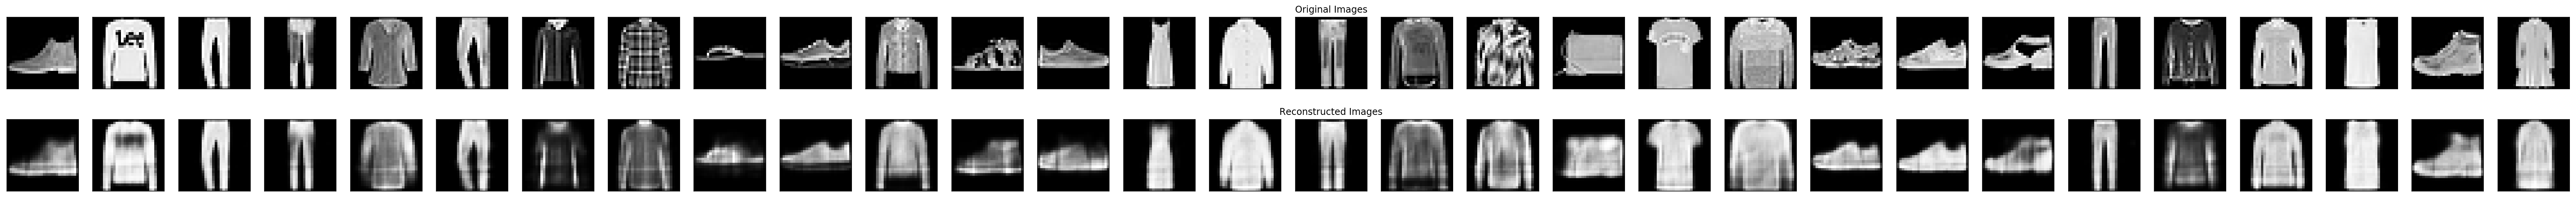

In [38]:
plot_autoencoder_outputs(autoencoder, 30, (28, 28))

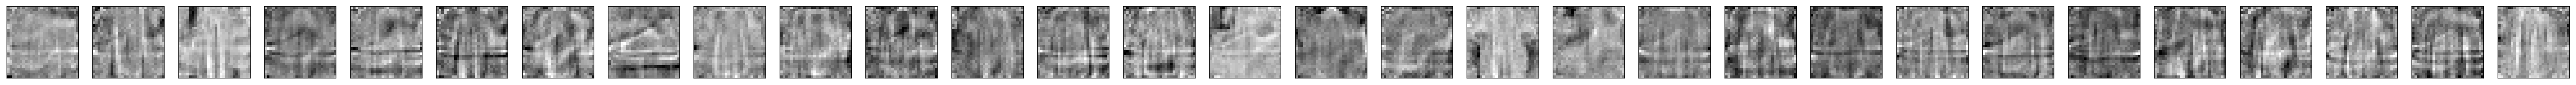

In [39]:
weights = autoencoder.get_weights()[0].T

n = 30
plt.figure(figsize=(n*2, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## Discussion of above results

After running for 5 epochs, we have a loss of 0.2835. The reconstructed images all look generally similar to the originals. What we see if that many of the detailed patterns in some of the clothes are lost. In the second image, we can no longer read the letters "Lee" but instead just have some blurry black across the chest of the shirt. In the 8th image, we lose the plaid design and just have a shirt that has grey that is faded in a similar pattern. However, it is clear that they are all similar to the original images. Training the model over more epochs would surely reduce the error and add more clarity and detail to the reconstructions, but particular details like "Lee" may still not be given in the reconstructions. I would say that this model is fully trained. With only a simple shallow encoder, the images will never be reconstructed in high detail. Additionally, we see the loss has essentially stopped decreasing at a significant rate.

The weights tend to look like very rough reconstructions of the images, they have many of the outlines of the original images. This makes sense, because by training the model and we are updating the weights to learn the images. The model has to condense the entire 784 dimension image to a 32 dimension code, so the weights are very important in making this compression and then being able to decode it back to a reconstructable image.

## Deep Autoencoder

Here we add an additional hidden layer in the encoding and decoding paths. In the shallow autoencoder, our input image is encoded from 784 dimensions to 32 dimensions and then is decoded back to 784 using a single encoding and decoding layer. Here, the hidden layer compresses the input from 784 dimensions to 128 dimensions and then we code from 128 dimensions to 32 dimensions (and then decodes back to 128 and then 784 dimensions). The first hidden layer uses a ReLU activation to convert to 128 dims. The next coding layer uses ReLU activation again to convert to a 32 dimension coded version of the image. Then, our first decoding layer (hidden_2) uses ReLU activation to convert from 32 to 128 dimensions. The final decoding step uses the sigmoid activation layer to convert back to a 784 dimension vector that we can display as the new reconstructed image. Here the code runs for 10 epochs instead of 6 in the shallow encoder.

In [7]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.3110
Epoch 2/10
60000/60000 [==============================] - 17s 277us/step - loss: 0.2856
Epoch 3/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.2806
Epoch 4/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.2781
Epoch 5/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.2767
Epoch 6/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.2757
Epoch 7/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.2749
Epoch 8/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.2743
Epoch 9/10
60000/60000 [==============================] - 17s 277us/step - loss: 0.2738
Epoch 10/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.2734


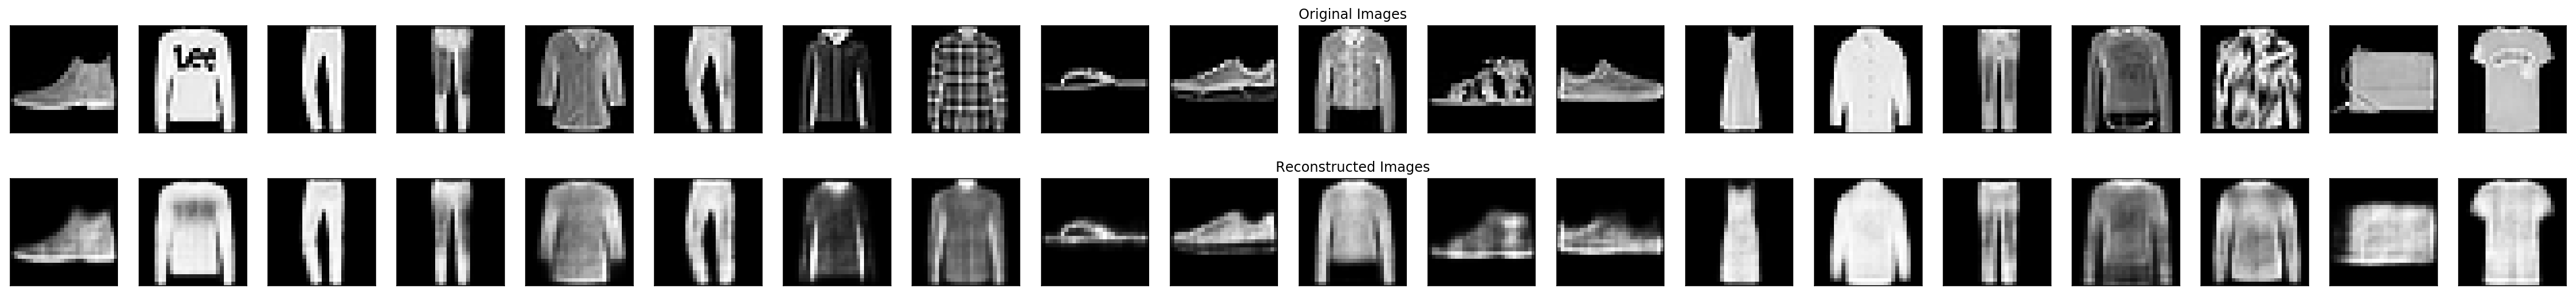

In [8]:
plot_autoencoder_outputs(autoencoder, 20, (28, 28))

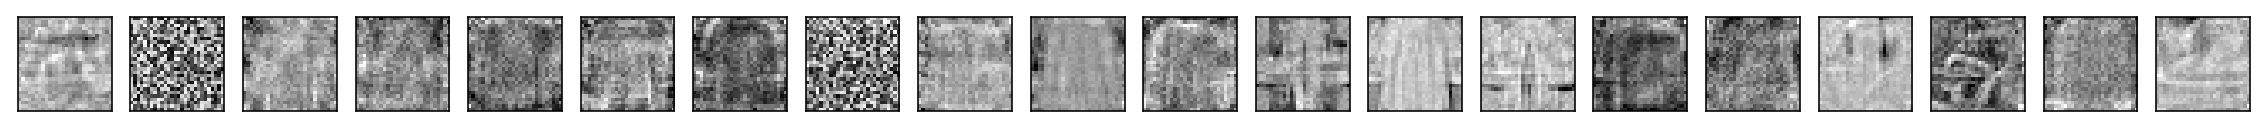

In [9]:
weights = autoencoder.get_weights()[0].T

n = 20
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## Discussion of above results
These reconstructions are definitely better than in the shallow encoder. This makes sense because we are adding an additional hidden layer to the process, thus training the model to our data better and reducing bias. We are bale to better identify actual patterns in the images. The plaid shirt image reconstruction shows a slightly plaid shading that was less clear in the shallow encoder. The shoe reconstructions are much clearer, particularly the flip-flop. We can now reconstruct the thin bridge over the foot, which we could not do in the shallow encoder. However, we still are unable to reconstruct "Lee" on the chest of the shirt, these letters may be too detailed for the model to learn. The reconstruction of these images is fairly good, so it seems reasonable that the model is fully trained. We see that the rate of decrease for the loss function is slowing as well. It is possible to train the model more, but at a computation and time cost. We do actually see in the sparse coding section below that running for more epochs does continue to improve the loss, but it takes a longer time to run.

The weights for the first layer of the encoder tend to be noisier than those in the shallow network. This may be because the image is only being compressed from 784 dimensions to 128 and therefore the weights are not being forced to learn the images as well. There is an additional layer in the network that can learn the images. When we reduce the dimensions from 784 to 32 in the shallow encoder, by minimize the loss function we are forcing the weights to learn the images much better since there is only a single layer to encode and decode the images.

## Denoising autoencoder

Here we add a random normal grey scale pixels weighted at 0.2 to each of our training and test images. Then we plot examples of the original image and the image plus the noise. With the human eye, the images are clearly similar, but less clear because of the random change in pixel shading that comes from the noise.

The actual implementation and training of the autoencoder is the same as the deep autoencoder with hidden layers in the encoding and decoding steps. They same dimensions are used when convert the original image to a 128 and 32 dimension code before decoding it to 128 and then 784 dimensions to be plotted.

We feed in noisy data, but will train the autoencoder to actually match the denoised original data.

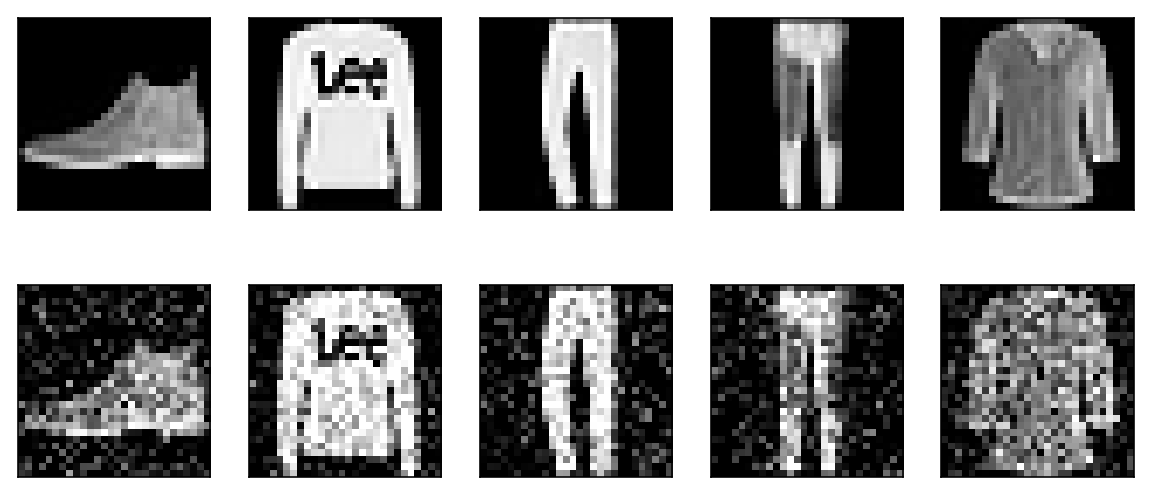

In [10]:
noise_factor = 0.20
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')

In [11]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.3188
Epoch 2/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.2927
Epoch 3/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.2878
Epoch 4/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.2855
Epoch 5/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.2839
Epoch 6/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.2828
Epoch 7/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.2820
Epoch 8/10
60000/60000 [==============================] - 36s 604us/step - loss: 0.2813
Epoch 9/10
60000/60000 [==============================] - 37s 609us/step - loss: 0.2808
Epoch 10/10
60000/60000 [==============================] - 35s 591us/step - loss: 0.2804


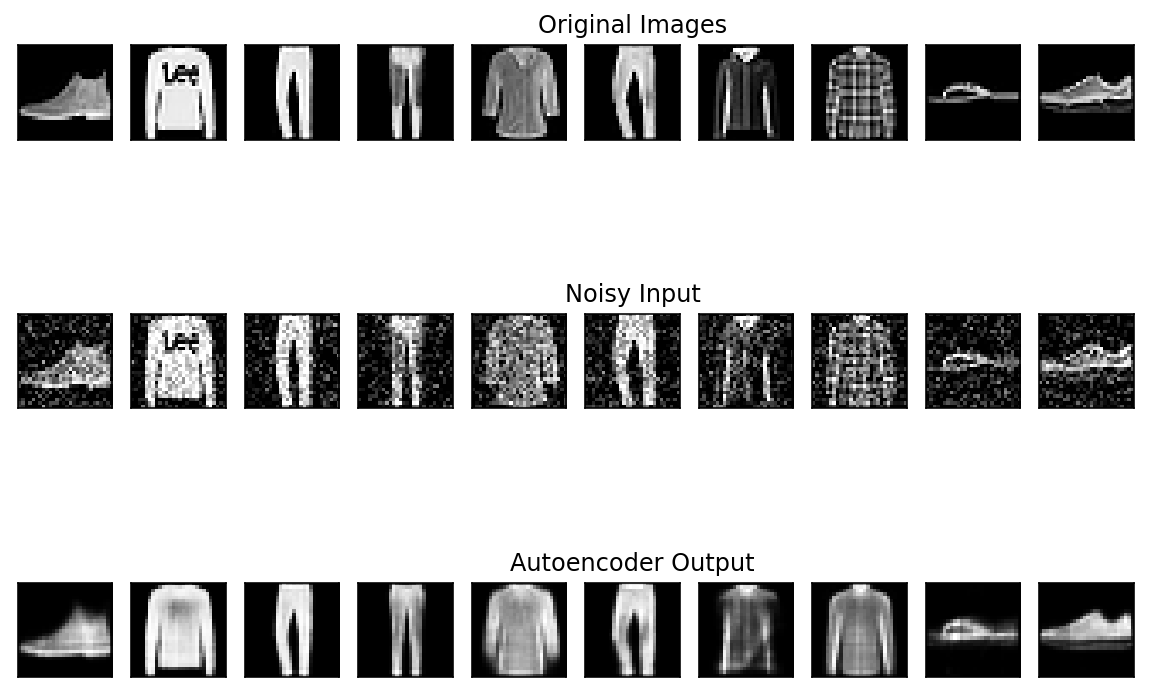

In [12]:
n = 10
plt.figure(figsize=(10, 7))

images = autoencoder.predict(x_test_noisy)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')
        
    # plot autoencoder output
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')

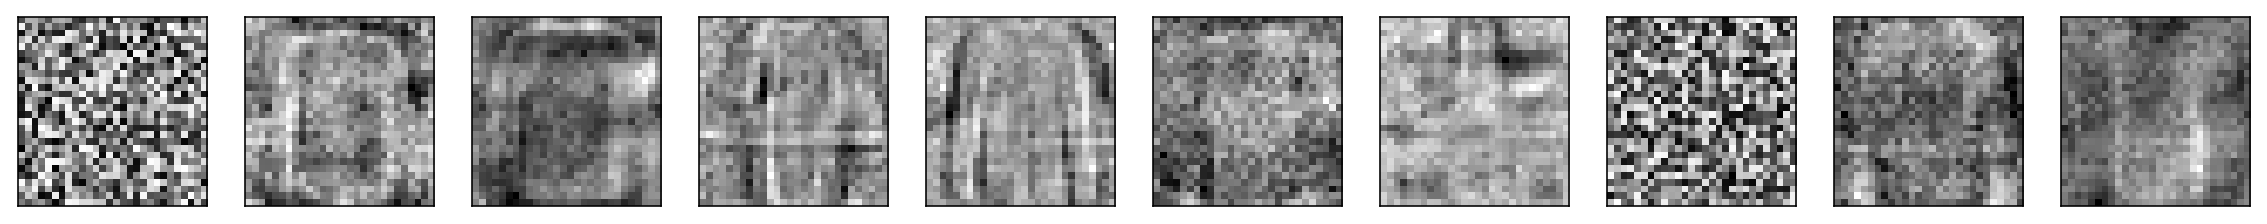

In [13]:
weights = autoencoder.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## Discussion of above results

Again, we get pretty good reconstructed images. We can see black shading where "Lee" should be on the second image and we can identify the bridge in the flip-flop in image 9. These images are slightly less clear than the plain deep autoencoder, but this makes sense. Here we are training on noisy versions of the image, so we won't be able to reconstruct as detailed images. This is useful if the data the model is trying to fit is inherently noisy (instead of just having added noise). We are able to reconstruct images that are clearer than the inputed noisy data. However, it is possible that the model is not fully trained and this is also why our reconstructions are not very clear. After 10 epochs, the loss was still decreasing. Running for more epochs would have trained a better model and thus created better reconstructions.

Looking at the weights, we again see a mix of noise and others that look like the outlines of clothing. Like above, we have an extra hidden layer compared to the shallow encoder so the model is not being forced to learn the nature of the image through one single set of weights.

## Sparse autoencoders

The first model is the same deep autoencoder model from above.

In the second model, the regularizaion parameter is added to the the first to encoding layers (input -> hidden layer, hidden layer -> code). The regularization parameter forces the weights to learn more important parts of the data. This is very similar to sparse coding, where the sparsity forces the model to learn edges in the images.

In [19]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder_standard = Model(input_img, output_img)
autoencoder_standard.compile(optimizer='adam', loss='binary_crossentropy')
history_standard = autoencoder_standard.fit(x_train, x_train, epochs=20)

encoded_standard = Model(input_img, code)

Epoch 1/20
60000/60000 [==============================] - 54s 905us/step - loss: 0.3107
Epoch 2/20
60000/60000 [==============================] - 55s 924us/step - loss: 0.2852
Epoch 3/20
60000/60000 [==============================] - 19s 312us/step - loss: 0.2807
Epoch 4/20
60000/60000 [==============================] - 43s 722us/step - loss: 0.2783
Epoch 5/20
60000/60000 [==============================] - 52s 872us/step - loss: 0.2767
Epoch 6/20
60000/60000 [==============================] - 40s 660us/step - loss: 0.2757
Epoch 7/20
60000/60000 [==============================] - 18s 301us/step - loss: 0.2749
Epoch 8/20
60000/60000 [==============================] - 18s 302us/step - loss: 0.2743
Epoch 9/20
60000/60000 [==============================] - 18s 305us/step - loss: 0.2737
Epoch 10/20
60000/60000 [==============================] - 22s 368us/step - loss: 0.2733
Epoch 11/20
60000/60000 [==============================] - 50s 839us/step - loss: 0.2729
Epoch 12/20
60000/60000 [=====

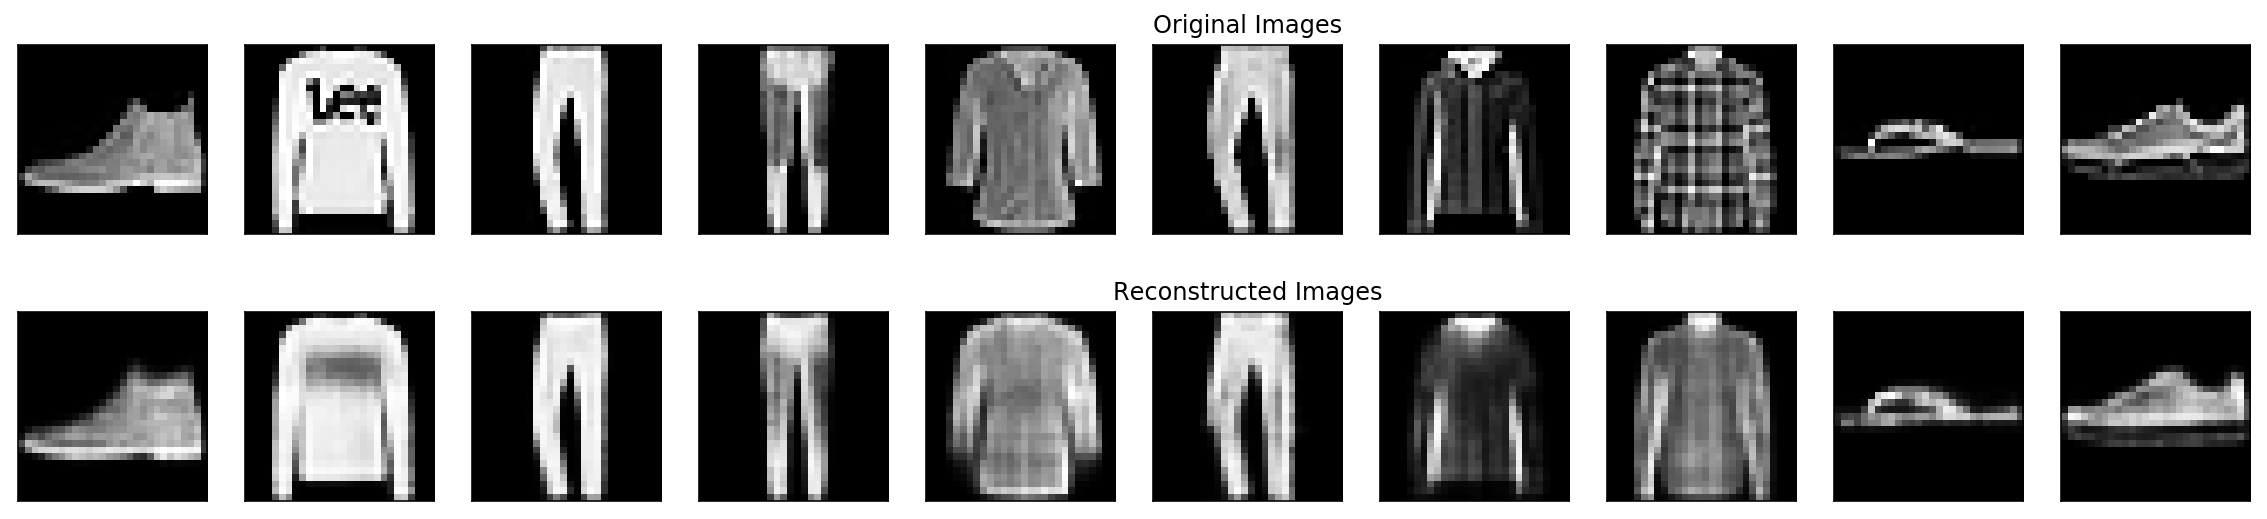

In [22]:
plot_autoencoder_outputs(autoencoder_standard, 10, (28, 28))

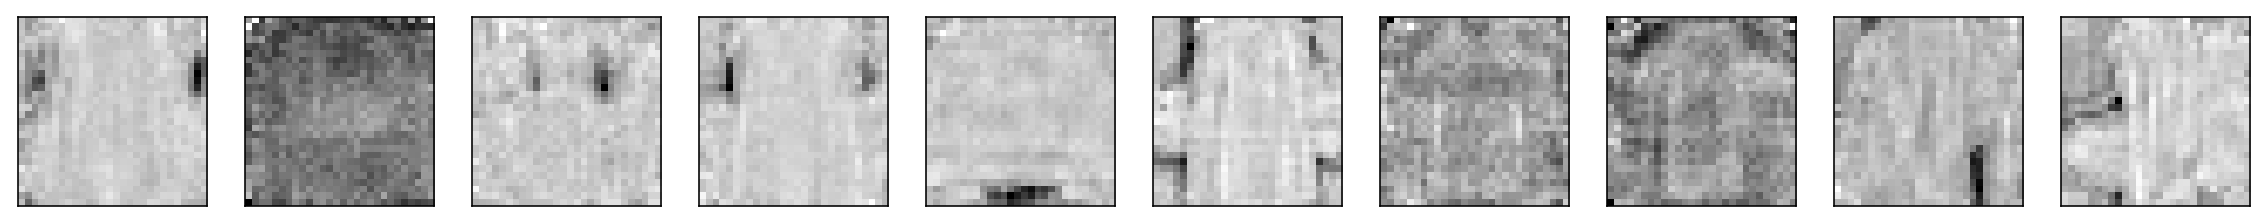

In [23]:
weights = autoencoder_standard.get_weights()[0].T

n = 10
plt.figure(figsize=(n*2, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [24]:
input_size = 784
hidden_size = 128
code_size = 32


input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu', activity_regularizer=l1(10e-6))(input_img)
code = Dense(code_size, activation='relu', activity_regularizer=l1(10e-6))(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder_regularized = Model(input_img, output_img)
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy')
history_regularized = autoencoder_regularized.fit(x_train, x_train, epochs=20)

encoded_regularized = Model(input_img, code)

Epoch 1/20
60000/60000 [==============================] - 19s 319us/step - loss: 0.3344
Epoch 2/20
60000/60000 [==============================] - 19s 308us/step - loss: 0.3040
Epoch 3/20
60000/60000 [==============================] - 19s 311us/step - loss: 0.2987
Epoch 4/20
60000/60000 [==============================] - 19s 310us/step - loss: 0.2953
Epoch 5/20
60000/60000 [==============================] - 18s 307us/step - loss: 0.2930
Epoch 6/20
60000/60000 [==============================] - 19s 310us/step - loss: 0.2913
Epoch 7/20
60000/60000 [==============================] - 18s 306us/step - loss: 0.2901
Epoch 8/20
60000/60000 [==============================] - 18s 304us/step - loss: 0.2891
Epoch 9/20
60000/60000 [==============================] - 18s 304us/step - loss: 0.2882
Epoch 10/20
60000/60000 [==============================] - 18s 307us/step - loss: 0.2876
Epoch 11/20
60000/60000 [==============================] - 19s 309us/step - loss: 0.2870
Epoch 12/20
60000/60000 [=====

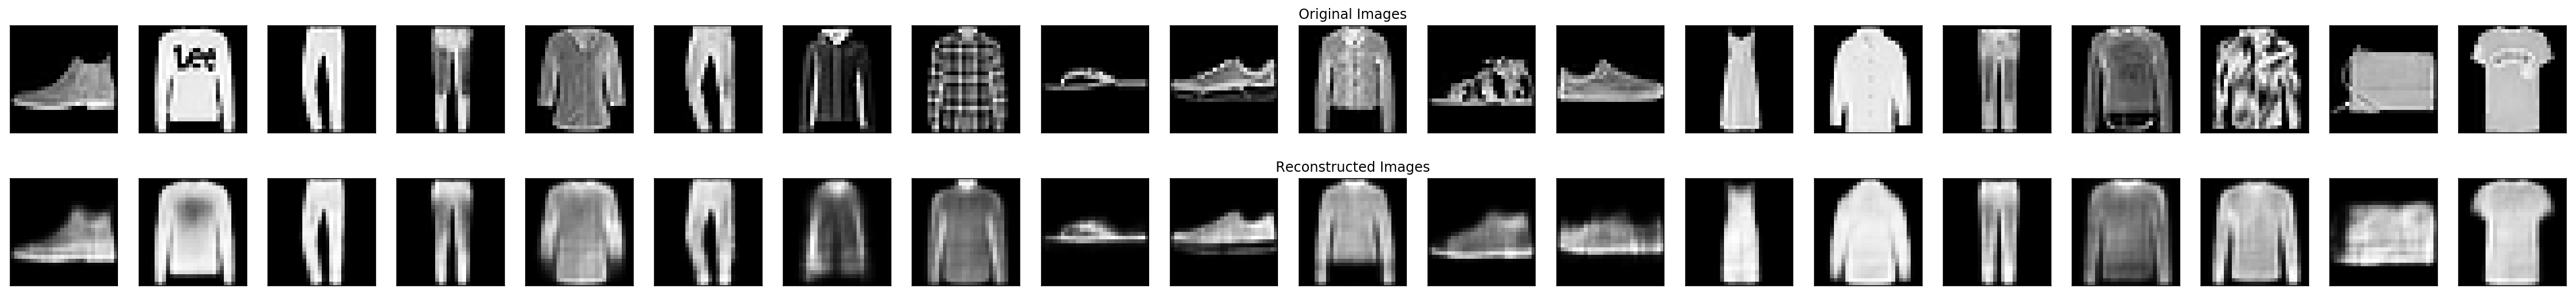

In [30]:
plot_autoencoder_outputs(autoencoder_regularized, 20, (28, 28))

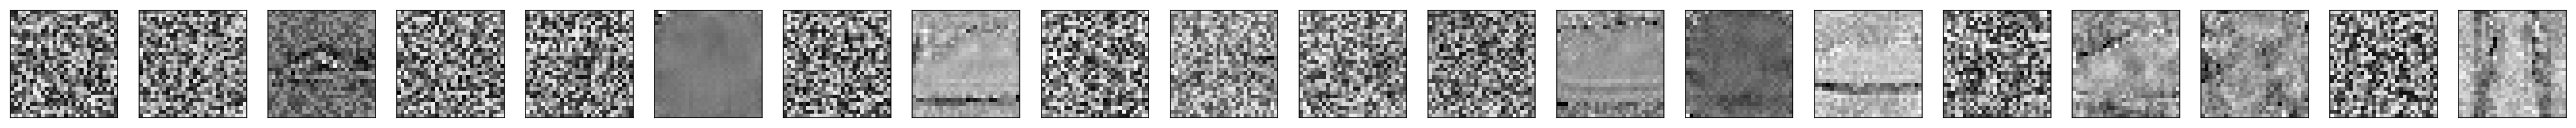

In [31]:
weights = autoencoder_regularized.get_weights()[0].T

n = 20
plt.figure(figsize=(2*n, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## Discussion of above results

Compared to the results in the first part of this section (again the same as the deep autoencoder just run for 20 epochs), the sparse autoencoder has a higher loss. Interestingly the reconstructed images from the sparse autoencoder may not have the same amount of detail within each item of clothing (i.e. the "Lee" is much blurrier and more of a blob, the plaid is less distinct, as is the bridge of the flip flop). However, the general shapes of the pieces of clothing are clearer. It is easier to see in the images of pants, that the legs are actually smoother than they are in the simple deep autoencoder. Instead of "memorizing" the details within the image, the sparsity forces the model to learn whether an images is a shirt or pair of pants. In some of the weights we see this as well, we see outlines of shoes in several that would suggest the model is learning those important shapes. However, the weights are generally more noisy than the rest of the models. This may be because the sparsity is preventing the model from fitting the training data as closely.

I would suggest that the models are fully trained. It is possible to run them for more epochs, but the loss is not likely to decrease.

## Evaluation metrics

The first evaluation metric is for the standard non-regularized autoencoder. The second evaluation metric is for the regularized sparse autoencoder. Here, the weights are penalized from becoming too large in magnitude. We see that the test error for the regularized model is less than those of the standard model. Again, this makes sense because instead of learning the details of the image, the sparse autoencoders learns more general but important features.

In [20]:
autoencoder_standard.evaluate(x_test, x_test)

10000/10000 [==============================] - 2s 163us/step


0.2727450199127197

In [21]:
autoencoder_regularized.evaluate(x_test, x_test)

10000/10000 [==============================] - 2s 182us/step


0.2860150758743286

In [22]:
print(encoded_standard.predict(x_test).mean())
print(encoded_regularized.predict(x_test).mean())

3.999385
0.16235968


## Training a series of shallow networks of varying complexity (10 points)

Your final task is to train a sequence of shallow networks, varying the code size parameter.
Plot the training error and test error as a function of the code size. Describing your findings. Interpret them in terms of the bias/variance tradeoff. 


In [10]:
sequence = range(1,102,10)

trainerror = np.empty(len(sequence))
testerror = np.empty(len(sequence))

for i in range(0,len(sequence)):
    input_size = 784
    code_size = sequence[i]

    input_img = Input(shape=(input_size,))
    code = Dense(code_size, activation='relu')(input_img)
    output_img = Dense(input_size, activation='sigmoid')(code)

    autoencoder = Model(input_img, output_img)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    autoencoder.fit(x_train, x_train, epochs=5)
    
    trainerror[i] = autoencoder.evaluate(x_train,x_train)
    testerror[i] = autoencoder.evaluate(x_test,x_test)

Epoch 1/5
60000/60000 [==============================] - 13s 223us/step - loss: 0.4822
Epoch 2/5
60000/60000 [==============================] - 13s 218us/step - loss: 0.4459
Epoch 3/5
60000/60000 [==============================] - 14s 237us/step - loss: 0.4358
Epoch 4/5
60000/60000 [==============================] - 14s 234us/step - loss: 0.4311
Epoch 5/5
10000/10000 [==============================] - 1s 98us/step
Epoch 1/5
60000/60000 [==============================] - 16s 260us/step - loss: 0.3537
Epoch 2/5
60000/60000 [==============================] - 15s 255us/step - loss: 0.3115
Epoch 3/5
60000/60000 [==============================] - 15s 254us/step - loss: 0.3075
Epoch 4/5
60000/60000 [==============================] - 15s 252us/step - loss: 0.3066
Epoch 5/5
10000/10000 [==============================] - 1s 117us/step
Epoch 1/5
60000/60000 [==============================] - 16s 272us/step - loss: 0.3374
Epoch 2/5
60000/60000 [==============================] - 16s 262us/step - lo

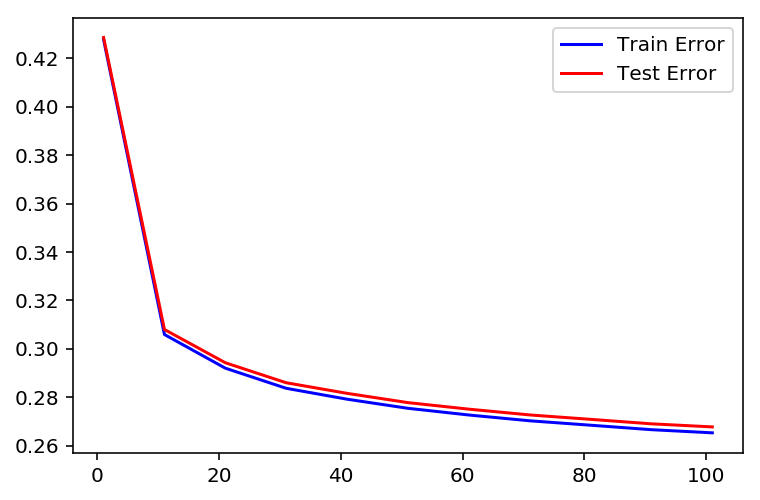

In [17]:
plt.plot(sequence,trainerror,'b-',label="Train Error")
plt.plot(sequence,testerror,'r-',label="Test Error")
plt.legend(labels=["Train Error","Test Error"])
plt.show()

## Comments

Without adding too many dimensions to the code size (due to computation time), we see that the error drops very quickly and then the rate of decrease slows down. As the size of the code increases, it is easier to train the model to reconstruct the images better. We do not see the test error beginning to increase again. This may because I only ran it for up to 100 dimensions, however there were several other students in office hours who said that running even up to size 500 did not see the test error begin to increase.

Conceptually, as the dimensions of the code increase, the model is forced to do less compression (compressing from 784 to 1 or 784 to 101 dimensions). This would then mean that the model is able to create a better reconstruction of the orginal image, so bias is decreasing. We can think of this as a deep or tree or a neural network with many hidden nodes. However, eventually, as we increase the code dimensions, we will begin to overfit our data and essentially just mirror the image. This would then increase variance as changes in the test data would increase the error.